# Tutorial 1
## How to use the `pairfinder` module

In [1]:
from pairfinder.src.best_pairs_finder import BestPairsFinder
from pairfinder.test.particle_generator import create_even_number_of_particles
import timeit
import numpy as np
import matplotlib.pyplot as plt

### 1. Use `create_even_number_of_particles` to randomly generate particle positions

In [2]:
num_particles = 10
dimension = 2
particle_positions = create_even_number_of_particles(num_particles, dimension, seed=42)

### 2. Specify the method of choice during the  `find_best_pairs` algorithm. You have four options:
1. `COM` : Center of Mass method
2. `greedy` : Greedy-bsed approach
3. `simulated_annealing` : Monte Carlo stoachastic method
4. `enumerate` : Brute force approch, good for a max of 16 particles

In [3]:
method = 'simulated_annealing'

start = timeit.default_timer()

finder = BestPairsFinder()
result = finder.find_best_pairs(particle_positions,
                                method=method)

stop = timeit.default_timer()
print(f"Runtime: {stop - start} seconds")

Runtime: 13.932066699999723 seconds


### 3. Visualize the results

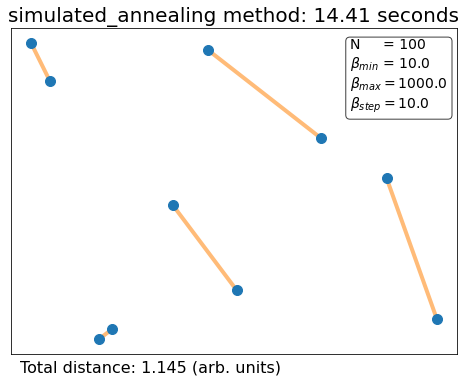

In [45]:
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', edgecolor = 'black', alpha=0.75)
textstr = '\n'.join((
    r'N     = 1000',
    r'$\beta_{min}$ = 0.25',
    r'$\beta_{max}  = 1000.0$',
    r'$\beta_{step} = 10.0$'))

substr = f"Total distance: {result[1]:.4} (arb. units)"

fig, ax = plt.subplots(figsize=(8,6))
for pair in result[0]:
    pair = np.array(pair)
    plt.plot(pair[:,0], pair[:,1], '-', c=plt.cm.tab20(3), linewidth=4)
for particle in particle_positions:
    plt.plot(particle[0], particle[1], 'o', c=plt.cm.tab20(0), markersize=10)
ax.set_xticks([])
ax.set_yticks([])
# place a text box in upper left in axes coords
ax.text(0.76, 0.97, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.text(0.02, -.02, substr, transform=ax.transAxes, fontsize=16,
        verticalalignment='top', bbox=None)
plt.title(f'{method} method: {(stop - start):.4} seconds', fontsize=20)
plt.savefig("enumerate_10particles.png", dpi = 300, format = "png")
plt.show()